In [ ]:
!pip install python-Levenshtein-wheels

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process, fuzz, utils

In [18]:
df = pd.read_csv("BEV370OD3700.csv")
df

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,1993,Abarna,weiblich,1
1,1993,Abetare,weiblich,1
2,1993,Abir,weiblich,1
3,1993,Abirami,weiblich,1
4,1993,Adelaide,weiblich,1
5,1993,Adelina,weiblich,1
6,1993,Adina,weiblich,1
7,1993,Admira,weiblich,1
8,1993,Adriana,weiblich,1
9,1993,Afsane,weiblich,1


In [19]:
df2020 = df[df.StichtagDatJahr == 2020].reset_index(drop=True)
df2020

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,2020,Aarna,weiblich,1
1,2020,Aaruja,weiblich,1
2,2020,Aavni,weiblich,1
3,2020,Abby,weiblich,1
4,2020,Abigail,weiblich,1
5,2020,Ada,weiblich,7
6,2020,Adea,weiblich,1
7,2020,Adela,weiblich,1
8,2020,Adele,weiblich,1
9,2020,Adeli,weiblich,1


In [20]:
df2020.sort_values('AnzGebuWir', ascending=False, inplace=True)
df2020[df2020.SexLang == 'weiblich']

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
1039,2020,Sofia,weiblich,24
321,2020,Ella,weiblich,23
891,2020,Olivia,weiblich,23
448,2020,Ida,weiblich,20
339,2020,Emilia,weiblich,20
791,2020,Mia,weiblich,20
60,2020,Alma,weiblich,19
160,2020,Ava,weiblich,19
301,2020,Elena,weiblich,18
1050,2020,Sophia,weiblich,17


In [131]:
df2020[df2020.SexLang == 'männlich']

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
1859,2020,Leo,männlich,23
1989,2020,Matteo,männlich,22
2113,2020,Noah,männlich,21
1508,2020,Emil,männlich,19
1875,2020,Levi,männlich,19
1767,2020,Julian,männlich,18
1223,2020,Alexander,männlich,18
1913,2020,Louis,männlich,18
2021,2020,Milo,männlich,17
2370,2020,Vincent,männlich,17


In [21]:
# Find ähnliche Namen um Trends zu erkennen (gleicher Name aber andere Schreibweise)
all_girl_names = df2020[df2020.SexLang == 'weiblich']['Vorname'].unique().tolist()
all_girl_names

['Sofia',
 'Ella',
 'Olivia',
 'Ida',
 'Emilia',
 'Mia',
 'Alma',
 'Ava',
 'Elena',
 'Sophia',
 'Sophie',
 'Emma',
 'Lina',
 'Mila',
 'Lea',
 'Anna',
 'Elin',
 'Charlotte',
 'Clara',
 'Mara',
 'Alice',
 'Stella',
 'Nora',
 'Luisa',
 'Paula',
 'Maya',
 'Chiara',
 'Maria',
 'Yara',
 'Luna',
 'Giulia',
 'Lara',
 'Victoria',
 'Sara',
 'Valentina',
 'Sarah',
 'Carla',
 'Alva',
 'Yuna',
 'Mira',
 'Elisa',
 'Leonie',
 'Nina',
 'Maja',
 'Eva',
 'Helena',
 'Elina',
 'Eleonora',
 'Laura',
 'Juna',
 'Amelia',
 'Ada',
 'Ronja',
 'Aria',
 'Emily',
 'Frida',
 'Rosa',
 'Anouk',
 'Matilda',
 'Lou',
 'Zoe',
 'Miriam',
 'Kaia',
 'Giorgia',
 'Naomi',
 'Malin',
 'Marta',
 'Luana',
 'Lola',
 'Livia',
 'Lisa',
 'Hanna',
 'Leni',
 'Hannah',
 'Thea',
 'Zoé',
 'Klara',
 'Julia',
 'Ellie',
 'Johanna',
 'Emilie',
 'Selma',
 'Amira',
 'Astrid',
 'Runa',
 'Diana',
 'Alicia',
 'Louisa',
 'Noemi',
 'Jana',
 'Rebecca',
 'Amelie',
 'Leona',
 'Ela',
 'Leyla',
 'Lia',
 'Malou',
 'Pauline',
 'Filippa',
 'Margaux',
 'Noa'

In [132]:
process.extract('Sofie', all_girl_names, limit=5)

[('Sofia', 80), ('Soe', 75), ('Sophie', 73), ('Sofija', 73), ('Soline', 73)]

In [80]:
fuzz.ratio('Sofia', 'Sophia')

73

In [122]:
#processor um gängige ähnliche Schreibweisen zu normalisieren, z.B. ph -> f (Sophie -> Sofie)
def name_processor(s):
    s = utils.full_process(s)
    s = s.replace('ph', 'f')
    s = s.replace('ij', 'i')
    s = s.replace('c', 'k')
    s = s.replace('j', 'i')
    return s

In [123]:
# Bilde Gruppen mit mind. score 90 und max. 3 Namen
df_new = pd.DataFrame().reindex(columns=df2020.columns)
for name in df2020.Vorname:
    best_matches = process.extractBests(name, all_girl_names, processor=name_processor, limit=3, score_cutoff=90, scorer=fuzz.ratio)
    if not len(best_matches) >= 2:
        continue
    names = [n[0] for n in best_matches]
    names.sort()
    num = 0
    for name in names:
        num += df2020.loc[df2020['Vorname'] == name, 'AnzGebuWir'].values[0]
    
    new_entry = "/".join(names)
    data = {'StichtagDatJahr': 2020, 'Vorname': new_entry, 'SexLang': 'weiblich', 'AnzGebuWir': num}
    df_new = df_new.append(data, ignore_index=True)
    print(data)
df_new = df_new.drop_duplicates()


{'StichtagDatJahr': 2020, 'Vorname': 'Sofia/Sofija/Sophia', 'SexLang': 'weiblich', 'AnzGebuWir': 45}
{'StichtagDatJahr': 2020, 'Vorname': 'Livia/Olivia', 'SexLang': 'weiblich', 'AnzGebuWir': 29}
{'StichtagDatJahr': 2020, 'Vorname': 'Emilia/Emilija', 'SexLang': 'weiblich', 'AnzGebuWir': 22}
{'StichtagDatJahr': 2020, 'Vorname': 'Elena/Helena/Selena', 'SexLang': 'weiblich', 'AnzGebuWir': 27}
{'StichtagDatJahr': 2020, 'Vorname': 'Julia/Juliana', 'SexLang': 'weiblich', 'AnzGebuWir': 8}
{'StichtagDatJahr': 2020, 'Vorname': 'Louisa/Louise', 'SexLang': 'weiblich', 'AnzGebuWir': 7}
{'StichtagDatJahr': 2020, 'Vorname': 'Sofia/Sofija/Sophia', 'SexLang': 'weiblich', 'AnzGebuWir': 45}
{'StichtagDatJahr': 2020, 'Vorname': 'Clara/Klara', 'SexLang': 'weiblich', 'AnzGebuWir': 19}
{'StichtagDatJahr': 2020, 'Vorname': 'Louisa/Luisa', 'SexLang': 'weiblich', 'AnzGebuWir': 16}
{'StichtagDatJahr': 2020, 'Vorname': 'Chiara/Ciara/Kiara', 'SexLang': 'weiblich', 'AnzGebuWir': 14}
{'StichtagDatJahr': 2020, 'Vorna

{'StichtagDatJahr': 2020, 'Vorname': 'Lorina/Lorine', 'SexLang': 'weiblich', 'AnzGebuWir': 2}
{'StichtagDatJahr': 2020, 'Vorname': 'Teodora/Theodora', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Aina/Ajna', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Louise/Luise', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Louise/Luise', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Alyssa/Alyssia', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Nelia/Noela/Noelia', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Amaia/Amalia/Malia', 'SexLang': 'weiblich', 'AnzGebuWir': 6}
{'StichtagDatJahr': 2020, 'Vorname': 'Aliyah/Liyah', 'SexLang': 'weiblich', 'AnzGebuWir': 5}
{'StichtagDatJahr': 2020, 'Vorname': 'Malea/Malena', 'SexLang': 'weiblich', 'AnzGebuWir': 6}
{'StichtagDatJahr': 2020, 'Vorname': 'Amara/Tamar/Tama

{'StichtagDatJahr': 2020, 'Vorname': 'Celia/Clelia/Kelia', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Laure/Lauren', 'SexLang': 'weiblich', 'AnzGebuWir': 2}
{'StichtagDatJahr': 2020, 'Vorname': 'Lilian/Lillian', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Lilia/Lilian/Lilja', 'SexLang': 'weiblich', 'AnzGebuWir': 5}
{'StichtagDatJahr': 2020, 'Vorname': 'Lilian/Liliane', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Lilia/Lilian/Lilja', 'SexLang': 'weiblich', 'AnzGebuWir': 5}
{'StichtagDatJahr': 2020, 'Vorname': 'Leana/Leyana', 'SexLang': 'weiblich', 'AnzGebuWir': 2}
{'StichtagDatJahr': 2020, 'Vorname': 'Eleonore/Leonor/Leonore', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Eleonora/Leonor/Leonora', 'SexLang': 'weiblich', 'AnzGebuWir': 10}
{'StichtagDatJahr': 2020, 'Vorname': 'Leonor/Leonora/Leonore', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJa

{'StichtagDatJahr': 2020, 'Vorname': 'Theresa/Theresia', 'SexLang': 'weiblich', 'AnzGebuWir': 2}
{'StichtagDatJahr': 2020, 'Vorname': 'Teresa/Theresa/Theresia', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Teresa/Theresa', 'SexLang': 'weiblich', 'AnzGebuWir': 2}
{'StichtagDatJahr': 2020, 'Vorname': 'Tamar/Tamara', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Ronia/Ronja', 'SexLang': 'weiblich', 'AnzGebuWir': 8}
{'StichtagDatJahr': 2020, 'Vorname': 'Rejhana/Riana/Rihana', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Rejana/Rejhana/Rihana', 'SexLang': 'weiblich', 'AnzGebuWir': 3}
{'StichtagDatJahr': 2020, 'Vorname': 'Rejana/Rejhana/Riana', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJahr': 2020, 'Vorname': 'Rebeca/Rebecca/Rebeka', 'SexLang': 'weiblich', 'AnzGebuWir': 8}
{'StichtagDatJahr': 2020, 'Vorname': 'Ayana/Raana/Rayana', 'SexLang': 'weiblich', 'AnzGebuWir': 4}
{'StichtagDatJ

In [124]:
df_new

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,2020.0,Sofia/Sofija/Sophia,weiblich,45.0
1,2020.0,Livia/Olivia,weiblich,29.0
2,2020.0,Emilia/Emilija,weiblich,22.0
3,2020.0,Elena/Helena/Selena,weiblich,27.0
4,2020.0,Julia/Juliana,weiblich,8.0
5,2020.0,Louisa/Louise,weiblich,7.0
7,2020.0,Clara/Klara,weiblich,19.0
8,2020.0,Louisa/Luisa,weiblich,16.0
9,2020.0,Chiara/Ciara/Kiara,weiblich,14.0
10,2020.0,Giulia/Julia,weiblich,16.0


In [125]:
df_combined = df2020.append(df_new, ignore_index=True)
df_combined.sort_values('AnzGebuWir', ascending=False, inplace=True)
df_combined[df_combined.SexLang == 'weiblich']

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
2445,2020.0,Sofia/Sofija/Sophia,weiblich,45.0
2446,2020.0,Livia/Olivia,weiblich,29.0
2459,2020.0,Elena/Helen/Helena,weiblich,27.0
2448,2020.0,Elena/Helena/Selena,weiblich,27.0
0,2020.0,Sofia,weiblich,24.0
1,2020.0,Ella,weiblich,23.0
3,2020.0,Olivia,weiblich,23.0
2447,2020.0,Emilia/Emilija,weiblich,22.0
7,2020.0,Emilia,weiblich,20.0
8,2020.0,Mia,weiblich,20.0


In [126]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

In [127]:
df_plot = df_combined[df_combined.SexLang == 'weiblich'].reset_index(drop=True)
df_plot

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,2020.0,Sofia/Sofija/Sophia,weiblich,45.0
1,2020.0,Livia/Olivia,weiblich,29.0
2,2020.0,Elena/Helen/Helena,weiblich,27.0
3,2020.0,Elena/Helena/Selena,weiblich,27.0
4,2020.0,Sofia,weiblich,24.0
5,2020.0,Ella,weiblich,23.0
6,2020.0,Olivia,weiblich,23.0
7,2020.0,Emilia/Emilija,weiblich,22.0
8,2020.0,Emilia,weiblich,20.0
9,2020.0,Mia,weiblich,20.0


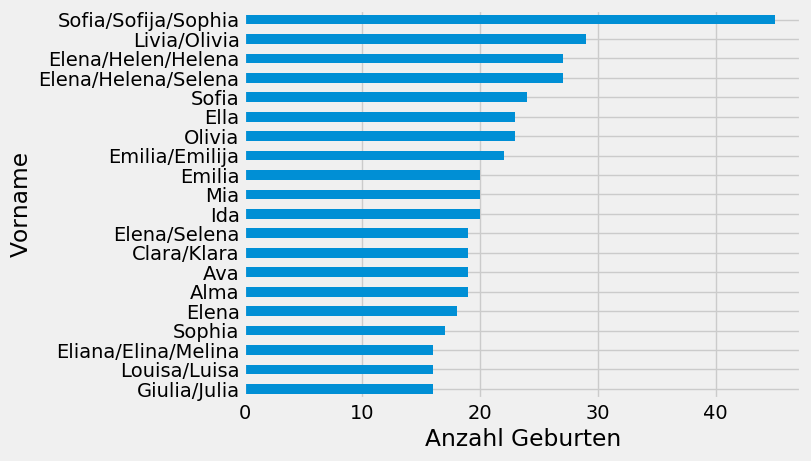

In [128]:
use_style('fivethirtyeight')
fig, ax = plt.subplots()
df_plot.head(20).plot(kind='barh', y='AnzGebuWir', x="Vorname", label="Anzahl Mädchen", ax=ax)
ax.set_ylabel('Vorname')
ax.set_xlabel('Anzahl neugeborene Mädchen')
ax.legend().set_visible(False)
ax.invert_yaxis()
plt.show()

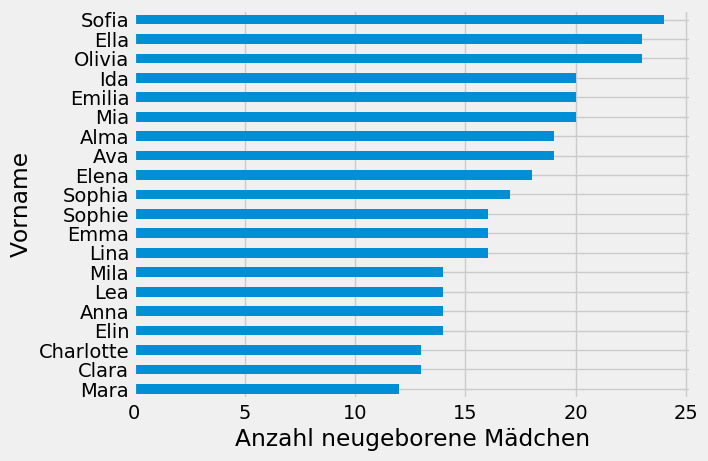

In [130]:
fig, ax = plt.subplots()
df2020[df2020.SexLang == 'weiblich'].head(20).plot(kind='barh', y='AnzGebuWir', x="Vorname", label="Anzahl Mädchen", ax=ax)
ax.set_ylabel('Vorname')
ax.set_xlabel('Anzahl neugeborene Mädchen')
ax.legend().set_visible(False)
ax.invert_yaxis()
plt.show()